# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [1]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## 💪 Competition challenge

In this report, we will cover the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

# Executive Summary: Nutritional Analysis of USDA Food Data

## Objectives:

The prior objective of this analysis was to derive insights from the USDA'S FoodData Central database, encompassing 7,793 common foods. The focus was on identifying foods rich in Vitamin C, understanding the nutritional composition and exploring the caloric contributions of different macronutrients.

## Key Findings:

1. **Vitamin C Content:**
    - The fruit with highest Vitamin C content is Acerola (West Indian Cherry) with a concentration of 1677.6mg per 100g.
    - Other sources of high Vitamin C content are Babyfood items top of the list with 2732.0mg of Vitamin C per 100g.
2. **Relationship between Calories & Water:**
    - A negative correlation exists between the water and calorie content of food items. Foods with higher water content generally contain fewer calories.
3. **Drawbacks of Zero-Carb & High-Protein Diets:**
    - Eliminating carbohydrates can lead to nutrient deficiencies, especially in fiber and vitamins typically found in fruits and vegetables.
    - A very high-protein diet, can lead to nutritional imbalances and health issues, such as kidney strain and heart health risks.
4. **Macronutrients Caloric Contribution:**
    - A linear model confirmed that fat contributes approximately 9 kilocalories per gram, and protein and carbohydrates contribute around 4 kilocalories per gram, aligning with the estimates provided by the Cleveland Clinic.
    - The model revealed that items with alcohol, fiber and sugar alcohols have caloric contents that deviate from predictions based solely on fat, protein and carbohydrate content.

## Conclusion

The analysis underscores the complexity of nutrition and the importance of a balanced diet. While macronutrients play a key role in determining calorie content, other factors such as alcohol, fiber, and sugar alcohols also contribute significantly. Dietary choices should be made considering the full nutritional profile of foods to maintain health and well-being.

In [2]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [3]:
df_food.head(10)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
5,167517,"Waffle, buttermilk, frozen, ready-to-heat, toa...",Baked Products,309.0 kcal,7.42 g,48.39 g,9.49 g,13.0 mg,2.6 g,31.57 g,0.0 g,0.0 mg
6,167518,"Waffle, buttermilk, frozen, ready-to-heat, mic...",Baked Products,289.0 kcal,6.92 g,44.16 g,9.4 g,16.0 mg,2.4 g,36.48 g,NaN,0.0 mg
7,167519,"Waffle, plain, frozen, ready-to-heat, microwave",Baked Products,298.0 kcal,6.71 g,45.41 g,9.91 g,16.0 mg,2.4 g,34.95 g,NaN,NaN
8,167520,"Pie Crust, Cookie-type, Graham Cracker, Ready ...",Baked Products,501.0 kcal,5.1 g,64.3 g,24.83 g,0.0 mg,1.9 g,4.37 g,0.0 g,0.0 mg
9,167521,"Pie Crust, Cookie-type, Chocolate, Ready Crust",Baked Products,484.0 kcal,6.08 g,64.48 g,22.42 g,0.0 mg,2.7 g,4.99 g,0.0 g,0.0 mg


In [4]:
df_food['Calories'] = df_food['Calories'].str.replace(' kcal', '').astype(float)
df_food['Protein'] = df_food['Protein'].str.replace(' g', '').astype(float)
df_food['Carbohydrate'] = df_food['Carbohydrate'].str.replace(' g', '').astype(float)
df_food['Total fat'] = df_food['Total fat'].str.replace(' g', '').astype(float)
df_food['Cholesterol'] = df_food['Cholesterol'].str.replace(' mg', '').astype(float)
df_food['Fiber'] = df_food['Fiber'].str.replace(' g', '').astype(float)
df_food['Water'] = df_food['Water'].str.replace(' g', '').astype(float)
df_food['Alcohol'] = df_food['Alcohol'].str.replace(' g', '').astype(float)
df_food['Vitamin C'] = df_food['Vitamin C'].str.replace(' mg', '').astype(float)

In [5]:
df_food.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

In [6]:
df_food = df_food.fillna(0)

# 1. Vitamin C Content

In [7]:
df_food['Category'].unique()

array(['Baked Products', 'Snacks', 'Sweets',
       'Vegetables and Vegetable Products',
       'American Indian/Alaska Native Foods', 'Restaurant Foods',
       'Beverages', 'Fats and Oils', 'Sausages and Luncheon Meats',
       'Dairy and Egg Products', 'Baby Foods', 'Poultry Products',
       'Pork Products', 'Breakfast Cereals',
       'Legumes and Legume Products', 'Finfish and Shellfish Products',
       'Fruits and Fruit Juices', 'Cereal Grains and Pasta',
       'Nut and Seed Products', 'Beef Products',
       'Meals, Entrees, and Side Dishes', 'Fast Foods',
       'Spices and Herbs', 'Soups, Sauces, and Gravies',
       'Lamb, Veal, and Game Products'], dtype=object)

In [8]:
fruits = df_food[df_food['Category'] == 'Fruits and Fruit Juices']
fruits.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
4992,167746,"Lemons, raw, without peel",Fruits and Fruit Juices,29.0,1.10,9.32,0.30,0.0,2.8,88.98,0.0,53.0
4993,167747,"Lemon juice, raw",Fruits and Fruit Juices,22.0,0.35,6.90,0.24,0.0,0.3,92.31,0.0,38.7
4994,167748,"Lemon juice from concentrate, canned or bottled",Fruits and Fruit Juices,17.0,0.45,5.62,0.07,0.0,0.7,93.64,0.0,14.3
4995,167749,"Lemon peel, raw",Fruits and Fruit Juices,47.0,1.50,16.00,0.30,0.0,10.6,81.60,0.0,129.0
4996,167750,"Prickly pears, raw",Fruits and Fruit Juices,41.0,0.73,9.57,0.51,0.0,3.6,87.55,0.0,14.0


In [9]:
fruits['Vitamin C'].max()

1677.6

In [10]:
fruits.sort_values('Vitamin C', ascending = False)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,32.0,0.40,7.69,0.30,0.0,1.1,91.41,0.0,1677.6
5221,171687,"Acerola juice, raw",Fruits and Fruit Juices,23.0,0.40,4.80,0.30,0.0,0.3,94.30,0.0,1600.0
5285,173044,"Guavas, common, raw",Fruits and Fruit Juices,68.0,2.55,14.32,0.95,0.0,5.4,80.80,0.0,228.3
5059,168152,"Jujube, Chinese, fresh, dried",Fruits and Fruit Juices,281.0,4.72,72.52,0.50,0.0,6.0,20.19,0.0,217.6
5126,169087,"Litchis, dried",Fruits and Fruit Juices,277.0,3.80,70.70,1.20,0.0,4.6,22.30,0.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5068,168161,"Prunes, dehydrated (low-moisture), stewed",Fruits and Fruit Juices,113.0,1.23,29.70,0.24,0.0,0.0,67.99,0.0,0.0
5067,168160,"Prunes, dehydrated (low-moisture), uncooked",Fruits and Fruit Juices,339.0,3.70,89.07,0.73,0.0,0.0,4.00,0.0,0.0
5098,168191,"Dates, medjool",Fruits and Fruit Juices,277.0,1.81,74.97,0.15,0.0,6.7,21.32,0.0,0.0
5135,169096,"Olives, pickled, canned or bottled, green",Fruits and Fruit Juices,145.0,1.03,3.84,15.32,0.0,3.3,75.28,0.0,0.0


**Acerola** is the fruit with highest Vitamin C with 1677.6 mg on a 100g serving.

In [11]:
top_10 = df_food.sort_values('Vitamin C', ascending = False).head(10)
top_10

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
3449,173487,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Baby Foods,64.0,1.10,14.82,0.00,2.0,1.2,83.83,0.0,2732.0
2140,167707,"Beverages, fruit-flavored drink, powder, with ...",Beverages,227.0,0.25,91.00,0.16,0.0,2.2,1.32,0.0,2400.0
2316,173237,"Beverages, Orange-flavor drink, breakfast type...",Beverages,217.0,3.60,85.90,0.00,0.0,3.8,1.80,0.0,2400.0
1454,169373,"Peppers, sweet, red, freeze-dried",Vegetables and Vegetable Products,314.0,17.90,68.70,3.00,0.0,21.3,2.00,0.0,1900.0
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,32.0,0.40,7.69,0.30,0.0,1.1,91.41,0.0,1677.6
5221,171687,"Acerola juice, raw",Fruits and Fruit Juices,23.0,0.40,4.80,0.30,0.0,0.3,94.30,0.0,1600.0
2373,174143,"Beverages, tea, green, instant, decaffeinated,...",Beverages,378.0,0.00,94.45,0.00,0.0,0.0,5.09,0.0,1342.3
1619,170075,"Chives, freeze-dried",Vegetables and Vegetable Products,311.0,21.20,64.29,3.50,0.0,26.2,2.00,0.0,660.0
7016,170921,"Spices, coriander leaf, dried",Spices and Herbs,279.0,21.93,52.10,4.78,0.0,10.4,7.30,0.0,566.7
2139,167681,"Beverages, fruit-flavored drink, dry powdered ...",Beverages,218.0,0.45,87.38,0.04,0.0,0.1,1.84,0.0,560.0


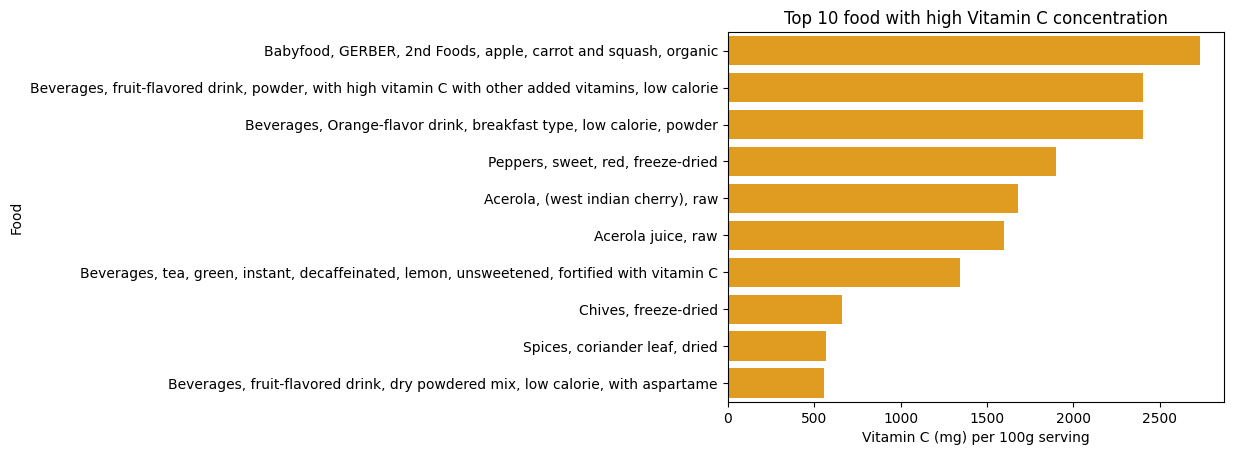

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_10, x='Vitamin C', y='Item', color='orange')
plt.xlabel('Vitamin C (mg) per 100g serving')
plt.ylabel('Food')
plt.title('Top 10 food with high Vitamin C concentration')
plt.show()

**Acerola** is in 5th position on the whole food dataset.

The food with highest Vitamin C concentration is a **babyfood**, followed by high vitamins **beverages** and **peppers** as the vegetable with the most Vitamin C.

# 2. Relationship between Calories & Water

In [13]:
df_food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


<AxesSubplot: xlabel='Water', ylabel='Count'>

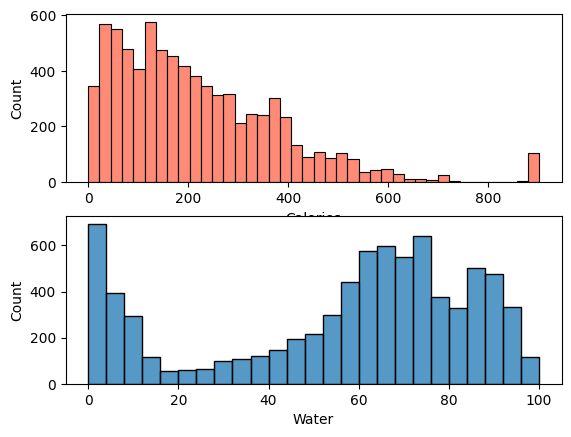

In [14]:
fig, axs = plt.subplots(2)
sns.histplot(data=df_food, x='Calories', ax=axs[0], color='tomato')
sns.histplot(data=df_food, x='Water', ax=axs[1])

<AxesSubplot: xlabel='Water', ylabel='Calories'>

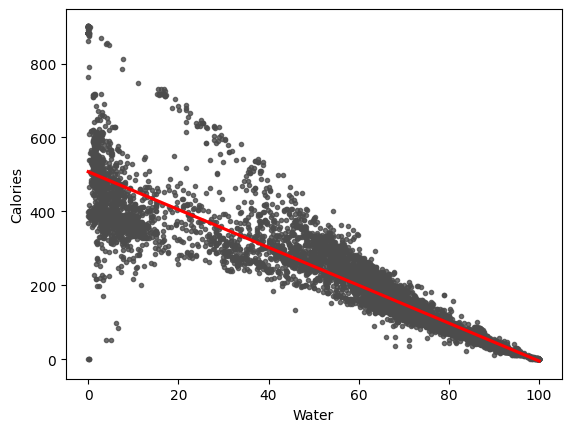

In [15]:
sns.regplot(data=df_food, x='Water', y='Calories', scatter=True, line_kws=dict(color='r'), marker='.', color='.3')

In [16]:
import scipy.stats as sts

sts.pearsonr(df_food['Water'], df_food['Calories'])

PearsonRResult(statistic=-0.8954571656706273, pvalue=0.0)

In [17]:
from sklearn.linear_model import LinearRegression

y = df_food['Calories']
X = df_food[['Water']]

model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)

[-5.12391293] 507.35371820613096


This linear regression represents the relationship between calories and water in food. As the coefficient for "water" is negative (-5.124), an increase in water predicts a decrease in calories.
The intercept (507.354) predicts the baseline calorie content when there is no "water".
The linear model equation is:

**Calories estimated** = -5.124**Water** + 507.354

# 3. Drawbacks of Zero-Carb & High-Protein Diets

In [18]:
zero_carb = df_food[df_food['Carbohydrate']==0]
high_prot = df_food[df_food['Protein']>=10]

In [19]:
# Comparing no-carb diet to the whole dataset
display(df_food.describe().transpose())
display(zero_carb.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
FDC_ID,7793.0,171408.000000,2249.789657,167512.0,169460.00,171408.00,173356.00,175304.00
Calories,7793.0,220.243118,168.752033,0.0,91.00,183.00,317.00,902.00
Protein,7793.0,11.926873,10.859968,0.0,2.27,8.98,20.77,88.32
Carbohydrate,7793.0,19.569788,25.705634,0.0,0.00,7.60,27.12,100.00
Total fat,7793.0,10.687361,16.381682,0.0,0.80,5.06,13.50,100.00
Cholesterol,7793.0,42.738997,123.450093,0.0,0.00,4.00,69.00,3100.00
Fiber,7793.0,1.836392,4.183677,0.0,0.00,0.00,2.10,79.00
Water,7793.0,56.033466,29.491176,0.0,38.14,64.16,77.96,100.00
Alcohol,7793.0,0.127679,1.643964,0.0,0.00,0.00,0.00,42.50
Vitamin C,7793.0,8.444604,66.031427,0.0,0.00,0.00,2.70,2732.00


,count,mean,std,min,25%,50%,75%,max
FDC_ID,2138.0,171840.760524,2291.414124,167607.0,169560.2500,172244.000,173841.75,175304.00
Calories,2138.0,233.555012,178.161432,0.0,143.0000,189.000,246.00,902.00
Protein,2138.0,22.289935,8.932579,0.0,19.5600,23.100,27.53,88.32
Carbohydrate,2138.0,0.000000,0.000000,0.0,0.0000,0.000,0.00,0.00
Total fat,2138.0,15.582214,22.376900,0.0,4.6800,8.395,15.53,100.00
Cholesterol,2138.0,93.452760,167.642418,0.0,63.0000,78.000,91.00,3100.00
Fiber,2138.0,0.000000,0.000000,0.0,0.0000,0.000,0.00,0.00
Water,2138.0,61.081712,18.242483,0.0,58.0325,64.535,71.41,100.00
Alcohol,2138.0,0.105613,1.955498,0.0,0.0000,0.000,0.00,42.50
Vitamin C,2138.0,0.669411,3.780309,0.0,0.0000,0.000,0.00,50.30


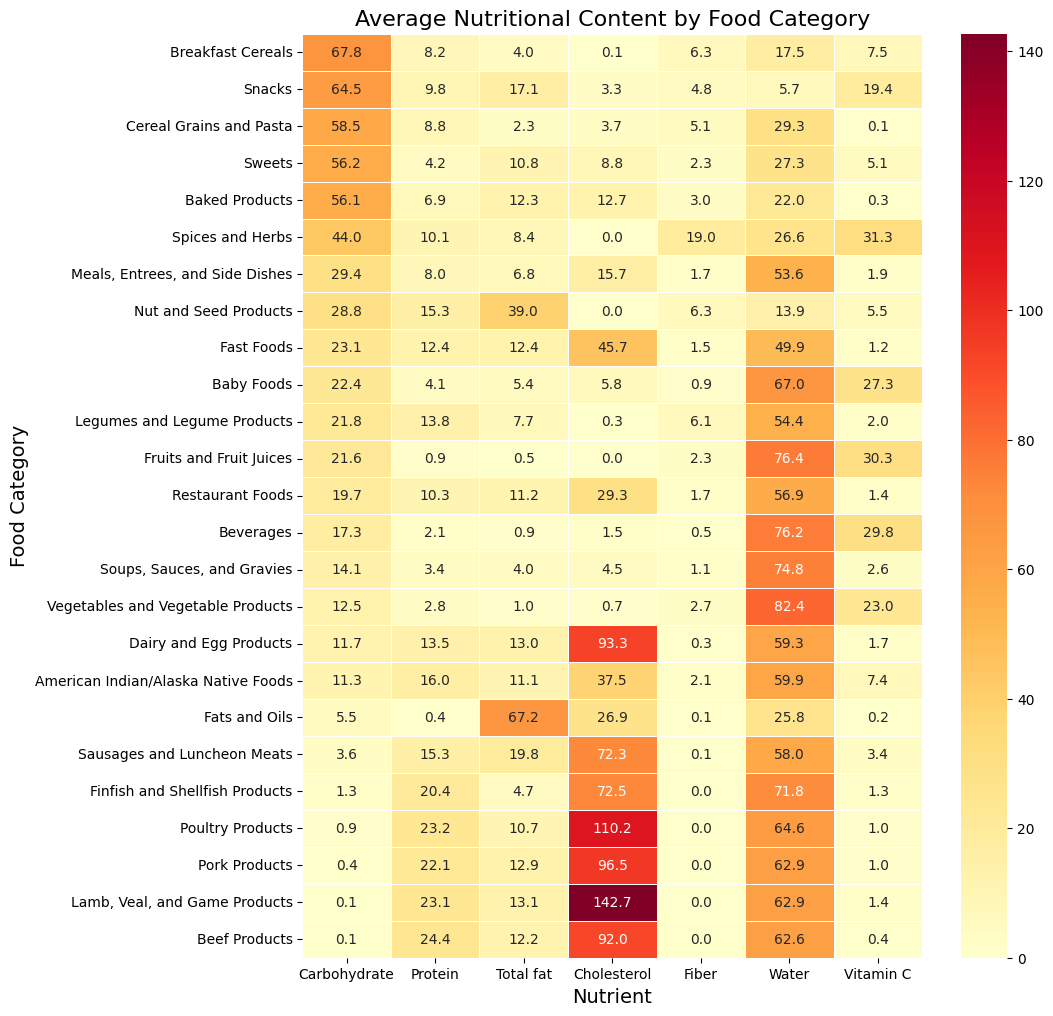

In [20]:
nutrient_columns = ['Carbohydrate', 'Protein', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Vitamin C']

# Group the data by category and calculate the mean for the selected nutrients
category_nutriment_means = df_food.groupby('Category')[nutrient_columns].mean().sort_values(by='Carbohydrate', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(category_nutriment_means, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5)

plt.title('Average Nutritional Content by Food Category', fontsize=16)
plt.xlabel('Nutrient', fontsize=14)
plt.ylabel('Food Category', fontsize=14)

plt.show()

The heatmap illustrates the average nutritional content by food category with highest carbohydrates content. As we can see, categories like 'Fruits and Fruit Juices' and 'Vegetables and Vegetable Products' are rich in these nutrients. A zero-car diet might exclude these categories and could lead to deficiencies in these important nutrients. It's evident that a varied diet, including a balance of carbohydrates is important for obtaining a wide range of nutrients. Eliminating carbohydrates implies a diet with no fiber, less Vitamin C, more protein, fat and cholesterol resulting in a more caloric diet.

In [21]:
# Comparing high-prot diet to the whole dataset
display(df_food.describe().transpose())
display(high_prot.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
FDC_ID,7793.0,171408.000000,2249.789657,167512.0,169460.00,171408.00,173356.00,175304.00
Calories,7793.0,220.243118,168.752033,0.0,91.00,183.00,317.00,902.00
Protein,7793.0,11.926873,10.859968,0.0,2.27,8.98,20.77,88.32
Carbohydrate,7793.0,19.569788,25.705634,0.0,0.00,7.60,27.12,100.00
Total fat,7793.0,10.687361,16.381682,0.0,0.80,5.06,13.50,100.00
Cholesterol,7793.0,42.738997,123.450093,0.0,0.00,4.00,69.00,3100.00
Fiber,7793.0,1.836392,4.183677,0.0,0.00,0.00,2.10,79.00
Water,7793.0,56.033466,29.491176,0.0,38.14,64.16,77.96,100.00
Alcohol,7793.0,0.127679,1.643964,0.0,0.00,0.00,0.00,42.50
Vitamin C,7793.0,8.444604,66.031427,0.0,0.00,0.00,2.70,2732.00


,count,mean,std,min,25%,50%,75%,max
FDC_ID,3691.0,171684.248442,2224.211337,167529.00,169744.00,171958.00,173672.500,175304.00
Calories,3691.0,241.939479,115.961809,48.00,156.00,215.00,301.500,719.00
Protein,3691.0,21.531363,8.019486,10.00,15.95,21.23,26.280,88.32
Carbohydrate,3691.0,11.238881,21.463885,0.00,0.00,0.00,9.840,83.70
Total fat,3691.0,12.374469,11.139536,0.00,4.66,9.18,16.365,79.55
Cholesterol,3691.0,82.463560,167.867708,0.00,38.00,69.00,88.000,3100.00
Fiber,3691.0,1.498402,4.477732,0.00,0.00,0.00,0.000,53.20
Water,3691.0,53.000144,22.970546,0.11,46.98,60.86,69.035,88.17
Alcohol,3691.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
Vitamin C,3691.0,3.689488,38.170371,0.00,0.00,0.00,0.000,1900.00


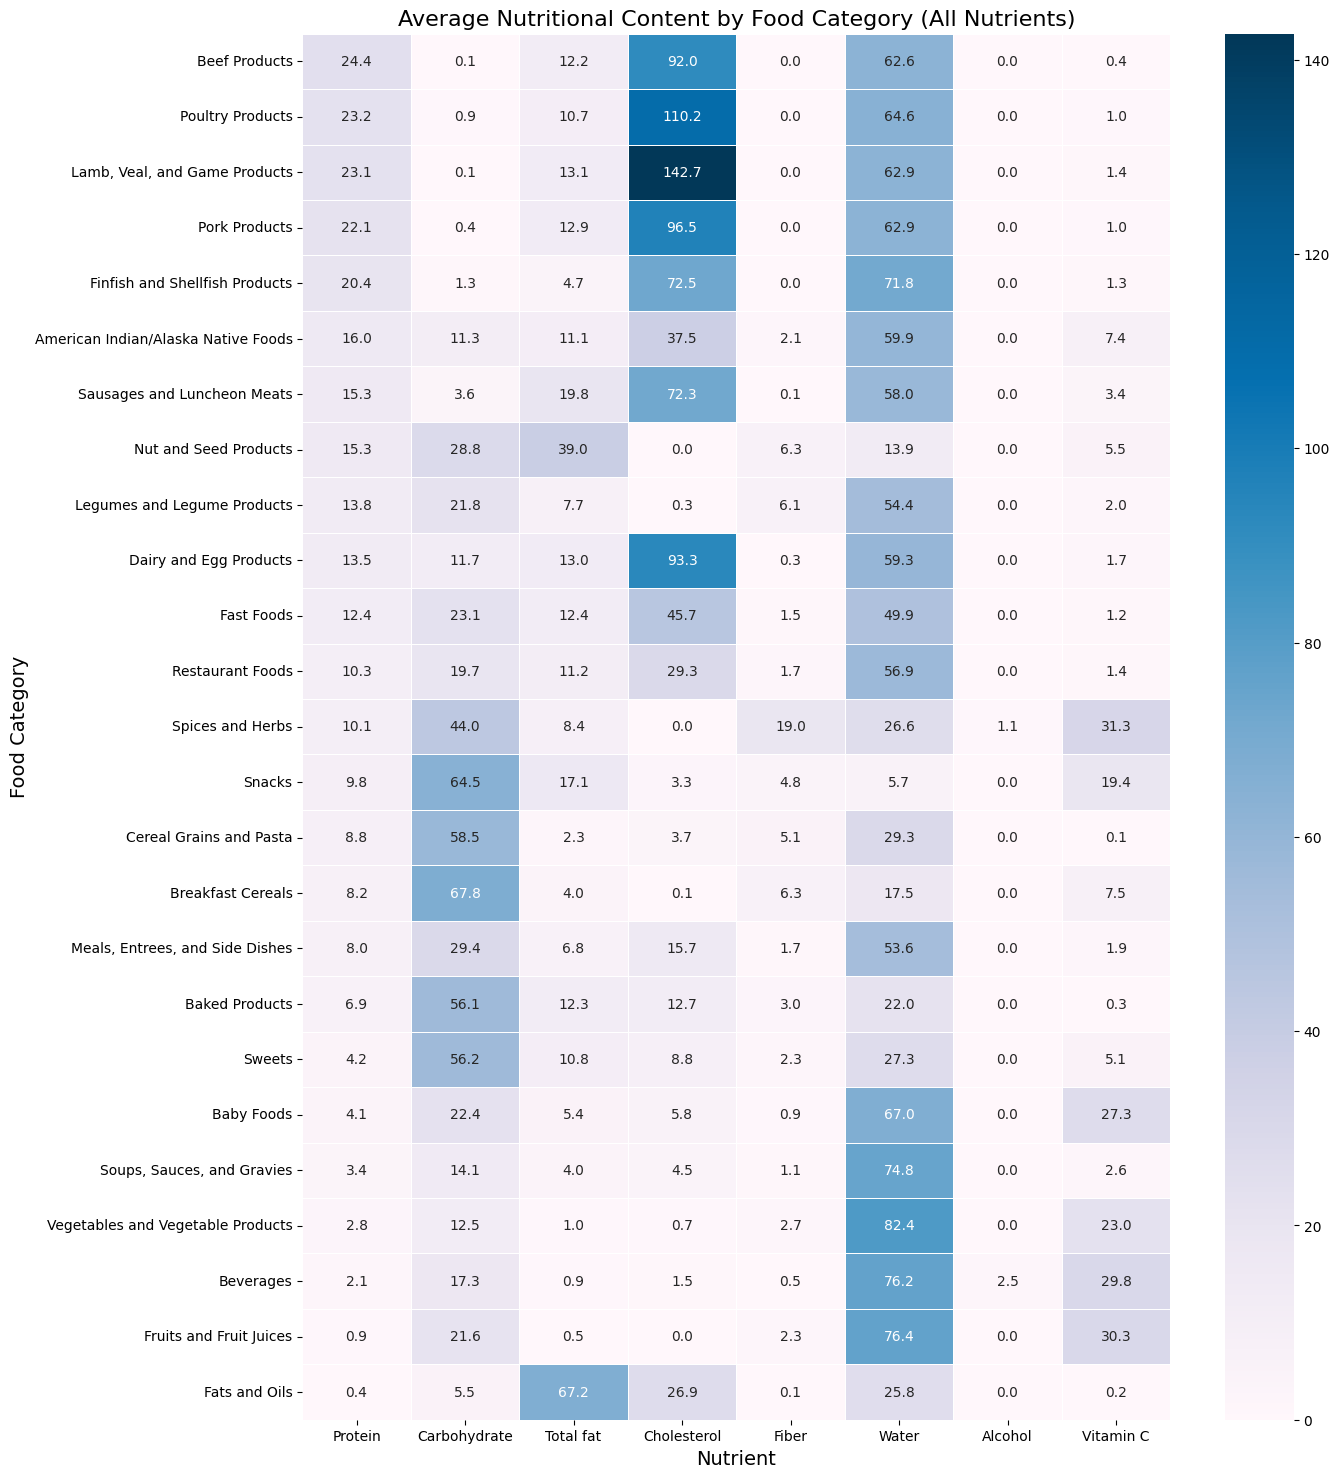

In [22]:
nutrient_columns_all = df_food.columns[4:]

# Group the data by category and calculate the mean for the selected nutrients
category_nutriment_means_all = df_food.groupby('Category')[nutrient_columns_all].mean().sort_values(by='Protein', ascending=False)

# Plot the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(category_nutriment_means_all, cmap='PuBu', annot=True, fmt=".1f", linewidths=.5)

plt.title('Average Nutritional Content by Food Category (All Nutrients)', fontsize=16)
plt.xlabel('Nutrient', fontsize=14)
plt.ylabel('Food Category', fontsize=14)

plt.show()

The heatmap illustates the average nutritional content by food category sorted by protein content. Categories with high average protein content, such as 'Poultry Products' and 'Beef Products' tend to have lower fiber and Vitamin C and higher cholesterol levels. This highlights the potential for nutrient imbalances in a very high-protein diet, particulatry if it limits the intake of plant-based foods rich in fiber and certain vitamins.

# 4. Macronutrients Caloric Contribution

According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Let's fit a linear model to test whether these estimates agree with the data.

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

y = df_food['Calories']
X = df_food[
    ['Total fat',
    'Protein',
    'Carbohydrate']
]

lr = LinearRegression()
lr.fit(X, y)
lr.coef_
print(list(zip(X, lr.coef_)))

[('Total fat', 8.804135012399348), ('Protein', 4.002044371074873), ('Carbohydrate', 3.798626270913906)]


The respective coefficients to each macronutrients are approximately like estimations from Cleveland Clinic.
Let's now fit this estimations to have a look on its predictions.

In [38]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y)
clev_lm = LinearRegression()
clev_lm.fit(X_tr, y_tr)
clev_lm.coef_ = np.array([9.0, 4.0, 4.0])

clev_lm.score(X_te, y_te)

0.9863554571122406

In [48]:
y_true, y_pred = y_te, clev_lm.predict(X_te)

true = np.array(y_true)
pred = np.array(y_pred)
pred = np.around(pred, decimals=1)

model_diff = pd.DataFrame({'Actual value': true, 'Predicted value': pred})
model_diff

,Actual value,Predicted value
0,35.0,44.4
1,588.0,633.2
2,257.0,261.1
3,55.0,58.4
4,28.0,33.9
...,...,...
1944,121.0,124.3
1945,147.0,151.0
1946,215.0,218.9
1947,336.0,339.3


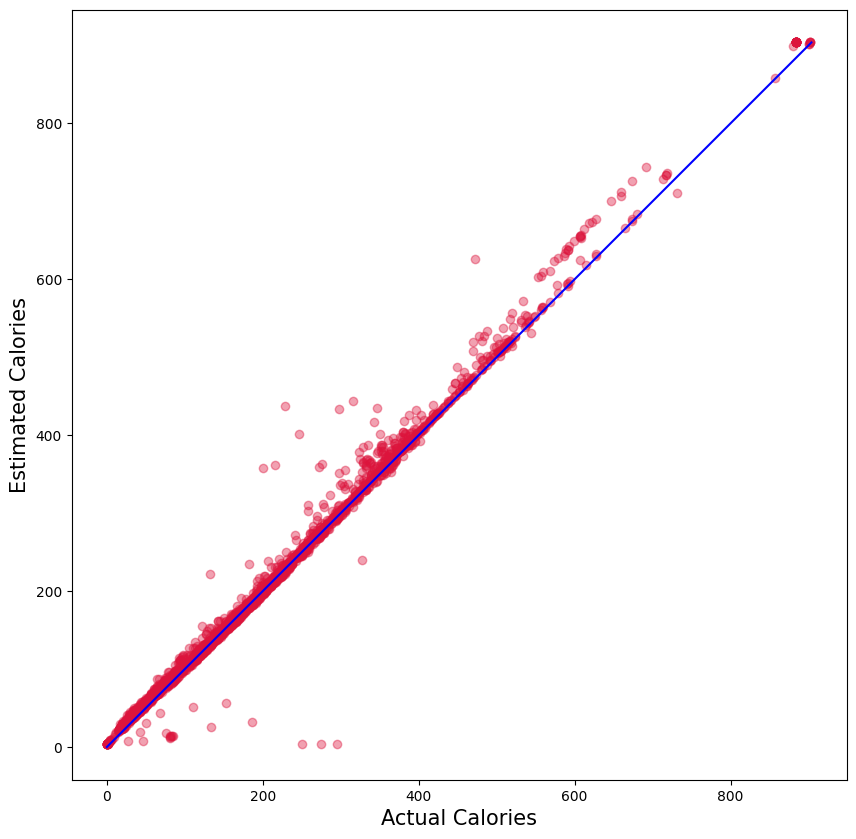

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(true, pred, c='crimson', alpha=0.4)

p1 = max(max(pred), max(true))
p2 = min(min(pred), min(true))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Calories', fontsize=15)
plt.ylabel('Estimated Calories', fontsize=15)
plt.axis('equal')
plt.show()

In [56]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_te, y_pred)
mse = metrics.mean_squared_error(y_te, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_te, y_pred))
r2 = metrics.r2_score(y_te, y_pred) # Or clev_lm.score(X_te, y_te)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 8.68069022449179
Mean Square Error: 388.37786986651633
Root Mean Square Error: 19.707304987402928
R-squared: 0.9863554571122406


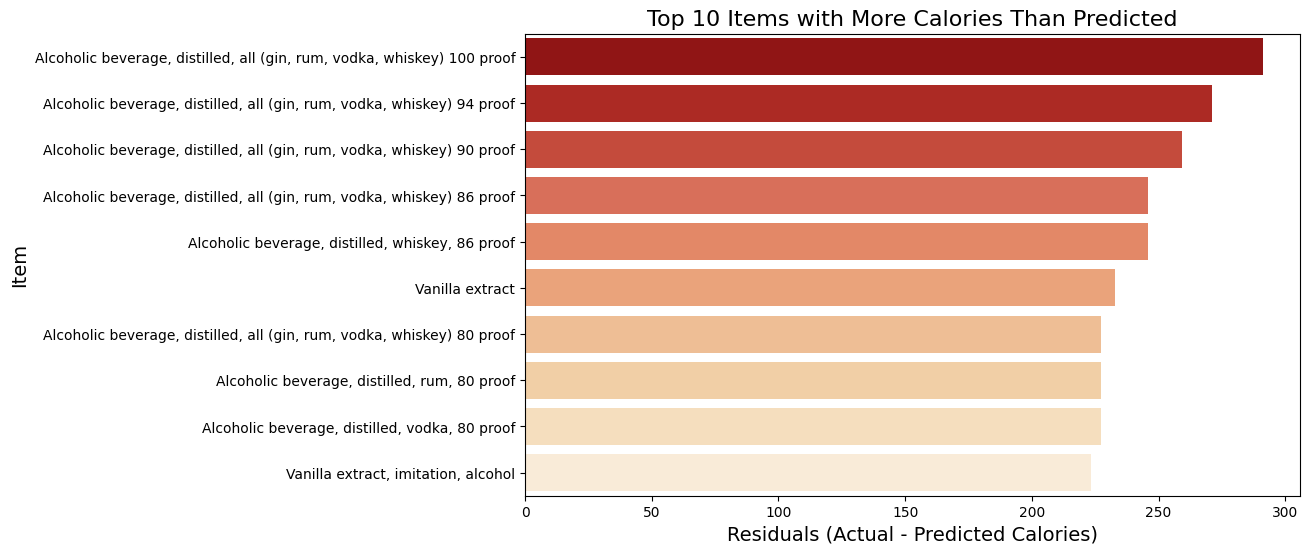

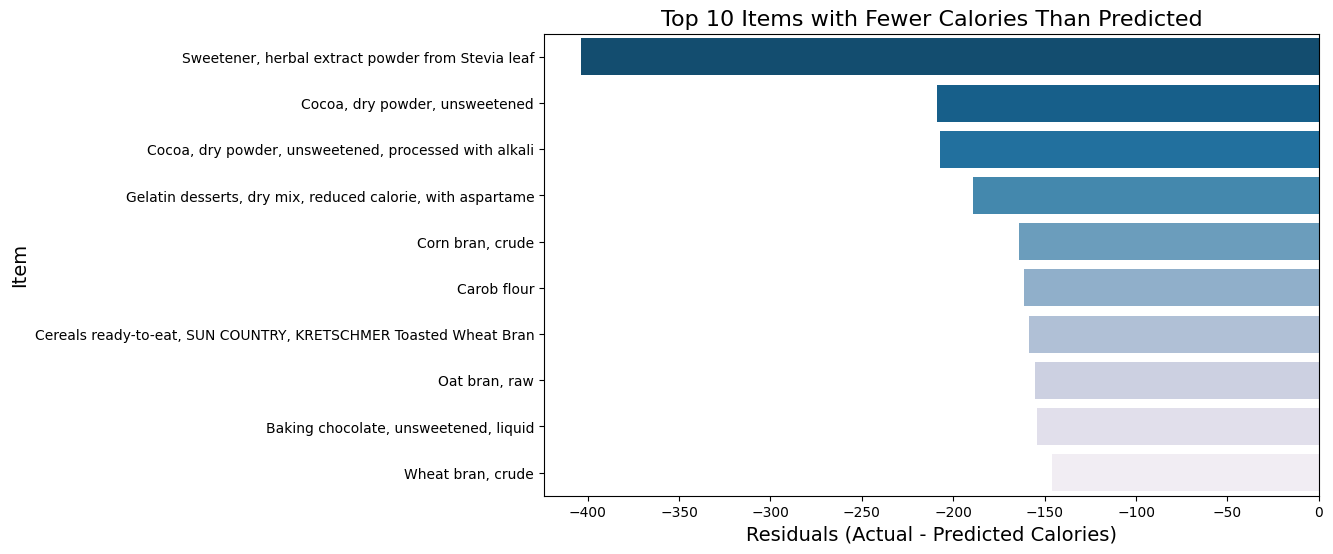

In [68]:
# Calculate the residuals (actual - predicted)
residuals = df_food['Calories'] - clev_lm.predict(X)

# Add the residuals to the original dataframe
df_food['Residuals'] = residuals

# Sort the data by the absolute value of the residuals to find the largest discrepancies
largest_residuals = df_food.sort_values(by='Residuals', key=abs, ascending=False)

#Display the items with the largest positive and negative residuals
largest_positive_residuals = largest_residuals[largest_residuals['Residuals'] > 0].head(10)
largest_negative_residuals = largest_residuals[largest_residuals['Residuals'] < 0].head(10)

largest_positive_residuals, largest_negative_residuals

# Plot the items with the largest positive residuals
plt.figure(figsize=(10, 6))
positive_residuals_plot = sns.barplot(
    x='Residuals',
    y='Item',
    data=largest_positive_residuals,
    palette='OrRd_r'
)

plt.title('Top 10 Items with More Calories Than Predicted', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted Calories)', fontsize=14)
plt.ylabel('Item', fontsize=14)

# Display the plot for positive residuals
plt.show()

# Plot the items with the largest negative residuals
plt.figure(figsize=(10, 6))
negative_residuals_plot = sns.barplot(
    x='Residuals', 
    y='Item', 
    data=largest_negative_residuals,
    palette='PuBu_r'
)

plt.title('Top 10 Items with Fewer Calories Than Predicted', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted Calories)', fontsize=14)
plt.ylabel('Item', fontsize=14)

# Display the plot for negative residuals
plt.show()

The errors in the model are due to food items with alcohol, fiber and sugar which are caloric contents that deviate from predictions solely based on macronutrients (fat, protein and carbohydrates).